<a href="https://colab.research.google.com/github/winengewe/Covid19-ICU-Prediction-Analysis/blob/main/Covid19_ICU_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  GP8R46 NPA Data Science
**Combined J2G246 Data Science, J2HN46 Data Citizenship & J2G646 Machine Learning Assessment**

You have been hired as a Data Scientist by the Scottish Government to assist them with the Covid19 pandemic. Using their daily published statistics you will make predictions on the amount of patients who will need to stay in Intensive Care Units (ICU). Enabling the NHS to allocate their resources effectively.



# Assessment Conditions
This evidence may be produced over the life of the unit, under loosely controlled conditions
(including access to reference materials). As the evidence is produced in loosely controlled
conditions it will be authenticated.

# Learning Outcomes
*J2G246 Data Science*

See [Unit Descriptor](https://www.sqa.org.uk/sqa/files/nq/J2G246.pdf) for further details.

Outcome 3
* Define the required analyses and data models.
* Create a relational data model from external sources of data.
* Perform data transformation to complete, correct and structure data.
* Perform descriptive and predictive analyses on the data.
* Create data visualisations and data dashboards to provide insights.
* Identify potential sources of bias in the analysis.

*J2HN46 Data Citizenship*

See [Unit Descriptor](https://www.sqa.org.uk/sqa/files/nq/J2HN46.pdf) for further details.

Outcome 3

* Extract information from data visualisations and dashboards.
* Evaluate a dataset in terms of its quality including potential bias.
* Interpret data to identify patterns and trends and draw conclusions.
* Create appropriate visualisations from data.
* Communicate findings and make recommendations based on conclusions.

*J2G646 Machine Learning*

See [Unit Descriptor](https://www.sqa.org.uk/sqa/files/nq/J2G646.pdf) for further details.

Outcome 4

* Select and use appropriate analytic tools to examine and choose appropriate features in a given dataset with a view to making predictions
* Select and use a linear regression algorithm to fit a regression model to a given dataset, and interpret its output in terms of performance
* Use an ensemble method to improve the performance of this regression model




# Assessment

To assist you with your assessment your lecturer has distilled the open license relational data from the [Scottish Government](https://www.gov.scot/publications/coronavirus-covid-19-trends-in-daily-data/) into a [Covid19 dataset](https://drive.google.com/drive/folders/1iiZ31W2DuojIdkQVQKw7EpoHxd-aeFtd?usp=share_link). You will need to download this and upload it to your sample_data folder to use in your Colab.





1. Import the Pandas, Numpy and Matplotlib libraries
2. Read the [Covid19 dataset](https://drive.google.com/file/d/1y88t5KypFBYmSCpD9iIiDA4_Fd1GgSmN/view?usp=drive_link) from your sample_data folder into a Pandas dataframe

In [ ]:
# 1. import libraries
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read in all the add on modules to allow for data manipulation and visualisation

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 2.Load and view the data
df=pd.read_csv("gdrive/My Drive/AI & Data Science (SCQF level 6) course/covid19.csv")
print('Data Info')
print(df.info())
print('\nData Head (First5rows)')
print(df.head())
print('\nData Tail (Last5rows)')
print(df.tail())
print('\nData Describe')
print(df.describe())

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            453 non-null    object 
 1   first_dose      445 non-null    float64
 2   second_dose     445 non-null    float64
 3   icu             453 non-null    int64  
 4   hospital        453 non-null    int64  
 5   positive_tests  75 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 21.4+ KB
None

Data Head (First5rows)
         date  first_dose  second_dose  icu  hospital  positive_tests
0  11/01/2021    163377.0       2758.0  126      1664             NaN
1  12/01/2021    175942.0       2857.0  133      1717             NaN
2  13/01/2021    191965.0       2990.0  134      1794             NaN
3  14/01/2021    208207.0       3190.0  142      1840             NaN
4  15/01/2021    224840.0       3331.0  141      1881             NaN

Data Tail (La

3. Using Pandas clean the dataset by removing missing data

In [ ]:
# 3.Check the file and Clean if needed
print("\nMissing values:\n", df.isnull().sum()) # Show the total of missing values for each column


Missing values:
 date                0
first_dose          8
second_dose         8
icu                 0
hospital            0
positive_tests    378
dtype: int64


In [ ]:
df= df.dropna() # Drop rows with missing values
print("\nAfter dropping rows with missing values:\n", df.isnull().sum())


After dropping rows with missing values:
 date              0
first_dose        0
second_dose       0
icu               0
hospital          0
positive_tests    0
dtype: int64


4. Explore the dataset both statistically and visually looking for useful correlations between 'icu' and other features

In [ ]:
df.corr(numeric_only=True)

,first_dose,second_dose,icu,hospital,positive_tests
first_dose,1.000000,0.814617,-0.211171,-0.716471,-0.230490
second_dose,0.814617,1.000000,-0.623253,-0.438264,-0.656142
icu,-0.211171,-0.623253,1.000000,0.201573,0.954329
hospital,-0.716471,-0.438264,0.201573,1.000000,0.131880
positive_tests,-0.230490,-0.656142,0.954329,0.131880,1.000000


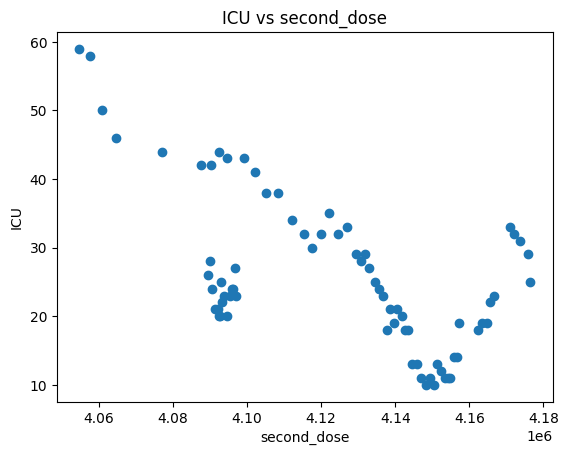

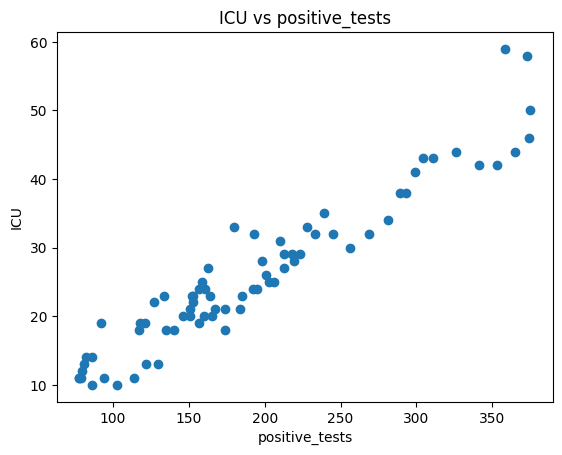

In [ ]:
plt.scatter(df['second_dose'], df['icu'])
plt.ylabel('ICU')
plt.xlabel('second_dose')
plt.title('ICU vs second_dose')
plt.show()

plt.scatter(df['positive_tests'], df['icu'])
plt.ylabel('ICU')
plt.xlabel('positive_tests')
plt.title('ICU vs positive_tests')
plt.show()

5. Analyse your findings
* Identify which feature is most correlated with 'icu' and will be useful to base predictions on?
* What possible reasons are there for 'icu' cases dropping compared to 'hosptial' patients for more recent dates?

*   **'positive_tests' is most correlated with 'icu' and will be useful to base preditions on.**
*   **Lower 'positive_tests' and higher 'second_dose' are the possible reasons for 'icu' cases dropping compared to 'hosptial' patients for more recent dates**



6. Explain the term data bias and identify an any potential bias in this dataset

**Bias is the error that occurs when a model is too simple to capture the true patterns in the data. For high bias, the model oversimplifies, misses patterns and underfits the data. Whereas for low bias, the model captures patterns well and is closer to the true values.**

**If we perform linear regression method in our machine learning model, the model will be too simple to capture the true patterns in the data.**

7. Use the feature you identified above and 'icu' to prepare datasets for a machine learning model. Create a numpy array called 'x' for the identified feature and one called 'y' for 'icu'.

In [ ]:
x=df[['positive_tests']].to_numpy()
y=df[['icu']].to_numpy()

8. Split these x and y numpy arrays into training and testing sets. Use a 90%/10% split.

In [ ]:
#split=int(0.9*len(df))
#x_train=x[:split]
#y_train=y[:split]
#x_test=x[split:]
#y_test=y[split:]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

9. Fit the LinearRegression model from SKLearn to the above training set

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

10. Use the LinearRegression model's score() method to statistically measure the performance on both the training and testing sets

In [ ]:
print("Train model score: ",model.score(x_train,y_train))
print("Test model score: ",model.score(x_test,y_test))

Train model score:  0.9137380304757513
Test model score:  0.8780080230574613


11. Use the LinearRegression model's predict() method and matplotlib to visualise the performance on both the training and testing sets

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

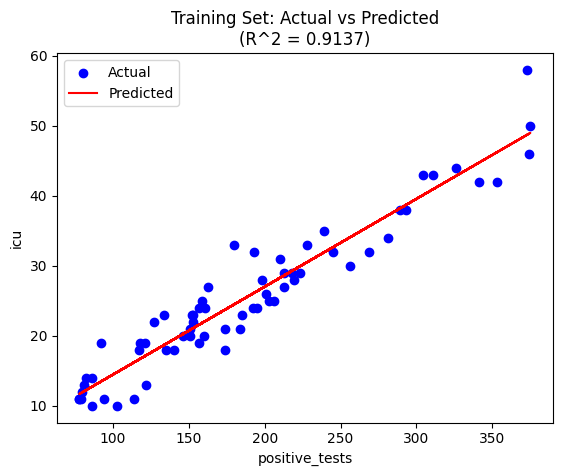

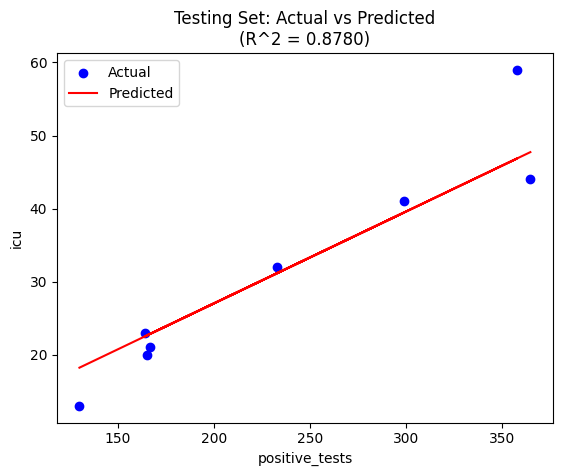

In [ ]:
plt.title(f'Training Set: Actual vs Predicted\n(R^2 = {model.score(x_train, y_train):.4f})')
plt.xlabel("positive_tests")
plt.ylabel("icu")
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,y_pred_train,color='red')
plt.legend(['Actual','Predicted'])
plt.show()

plt.title(f'Testing Set: Actual vs Predicted\n(R^2 = {model.score(x_test, y_test):.4f})')
plt.xlabel("positive_tests")
plt.ylabel("icu")
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred_test,color='red')
plt.legend(['Actual','Predicted'])
plt.show()

12. Use all the features to prepare datasets for a more powerful machine learning model. Create a numpy multi-dimensional array called 'x' for the all the features and again one called 'y' for 'icu'.  

In [ ]:
x = df.drop(columns=['icu','date']).to_numpy()
y=df[['icu']].to_numpy()

13. Split these x and y numpy arrays into training and testing sets. Use a 90%/10% split again.



In [ ]:
#split=int(0.9*len(df))
#x_train=x[:split]
#y_train=y[:split]
#x_test=x[split:]
#y_test=y[split:]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

14. Fit the powerful RandomForestRegressor model from SKLearn to the above training set

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

15. Use the RandomForestRegressor model's score() method to statistically measure the performance on both the training and testing sets

In [ ]:
print("Train model score: ",model.score(x_train,y_train))
print("Test model score: ",model.score(x_test,y_test))

Train model score:  0.9895428624872181
Test model score:  0.9470066119436704


16. Use the RandomForestRegressor model's predict() method and matplotlib to visualise the performance on both the training and testing sets

In [ ]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

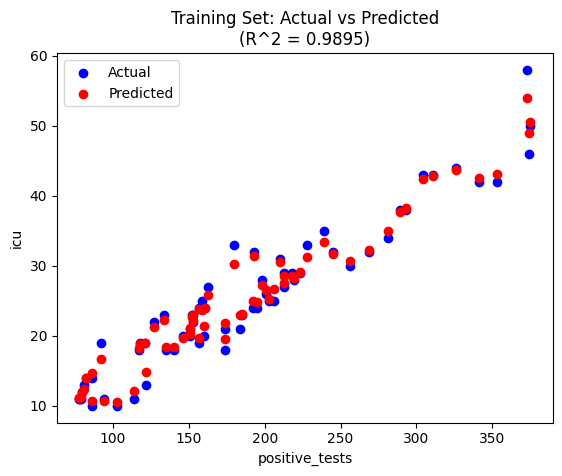

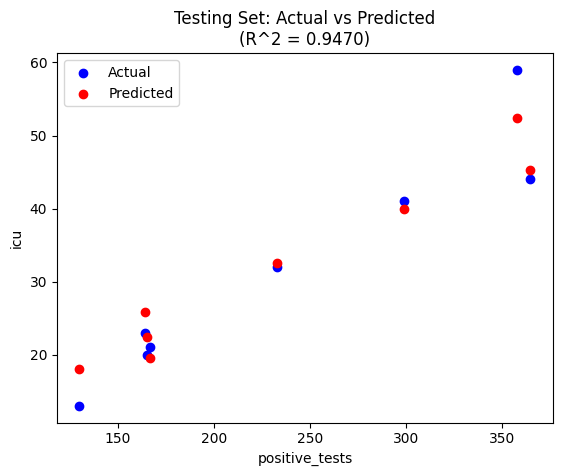

In [ ]:
plt.scatter(x_train[:,3],y_train,color='blue')
plt.scatter(x_train[:,3],y_pred_train,color='red')
plt.title(f'Training Set: Actual vs Predicted\n(R^2 = {model.score(x_train, y_train):.4f})')
plt.xlabel("positive_tests")
plt.ylabel("icu")
plt.legend(['Actual','Predicted'])
plt.show()

plt.scatter(x_test[:,3],y_test,color='blue')
plt.scatter(x_test[:,3],y_pred_test,color='red')
plt.title(f'Testing Set: Actual vs Predicted\n(R^2 = {model.score(x_test, y_test):.4f})')
plt.xlabel("positive_tests")
plt.ylabel("icu")
plt.legend(['Actual','Predicted'])
plt.show()

17. Explain the results from the Linear Regression and Random Forest models.
* Which had the best the performance on the training set?
* Which had the best performance on the test set?
* Which model would you use for making 'icu' predictions?
* How come?
* How could you improve the predictions of the other model?

*   **The Random Forest model had the best training performance ($99.0\%$ vs $91.4\%$). It essentially memorized the patterns in the training data almost perfectly.**
*   **The Random Forest model also had the best testing performance ($94.7\%$ vs $87.8\%$). This means it was much better at predicting ICU numbers for the "unseen" data it hadn't studied before.**
*   **I would use the Random Forest model.**
*   **Random Forest used all available data while Linear Regression model was restricted to a single variable. Besides, Linear Regression assumes the relationship is a straight line. However, the relationship is likely non-linear. For example, high vaccination rates might "dampen" the effect of positive cases on ICU admissions. Random Forests can learn these complex, curving rules and interactions, whereas Linear Regression cannot.**
*   **Adding More Features: Rerun the model using all the columns instead of just one. Feature Engineering (Polynomials): Create polynomial feature by squaring the values x^2 to allow linear model to fit curved data**.





